In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1977)

In [2]:
def MC(nsteps=100,delta=0.1,q0=0.0):
    q=q0
    kappa=1.0
    ene=0.5*kappa*q**2
    traj=[]
    for istep in range(nsteps):
        qtry=q+(2*np.random.rand()-1)*delta
        enetry=0.5*kappa*qtry**2
        acceptance=np.exp(-(enetry-ene))
        if acceptance>np.random.rand():
            q=qtry
            ene=enetry
        traj.append(q)
    return np.array(traj)

In [3]:
traj=MC()

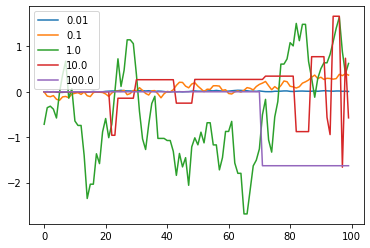

In [4]:
for delta in [0.01,0.1,1.0,10.0,100.0]:
    plt.plot(MC(delta=delta),label=str(delta))
plt.legend()
plt.show()

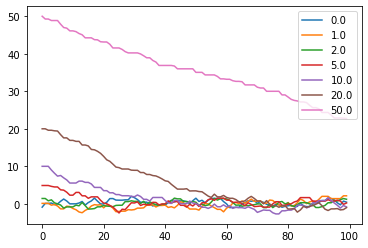

In [5]:
for q0 in [0.0,1.0,2.0,5.0,10.0,20.0,50.0]:
    plt.plot(MC(q0=q0,delta=1.0),label=str(q0))
plt.legend()
plt.show()

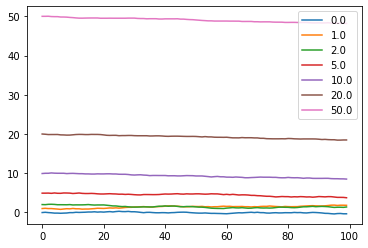

In [6]:
for q0 in [0.0,1.0,2.0,5.0,10.0,20.0,50.0]:
    plt.plot(MC(q0=q0,delta=0.1),label=str(q0))
plt.legend()
plt.show()

/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


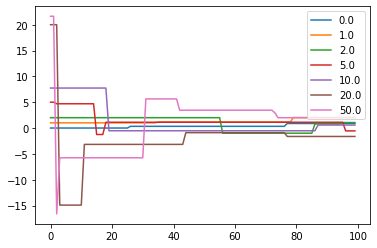

In [7]:
for q0 in [0.0,1.0,2.0,5.0,10.0,20.0,50.0]:
    plt.plot(MC(q0=q0,delta=100),label=str(q0))
plt.legend()
plt.show()

In [8]:
def MC(nsteps=100,delta=0.1,q0=0.0):
    q=q0
    kappa=1.0
    ene=0.5*kappa*q**2
    traj=[]
    acc=[]
    for istep in range(nsteps):
        qtry=q+(2*np.random.rand()-1)*delta
        enetry=0.5*kappa*qtry**2
        deltae=enetry-ene
        if deltae<=0.0:
            acceptance=1.0
        else:
            acceptance=np.exp(-deltae)
        # acceptance=np.exp(-deltae) # WRONG
        if acceptance>np.random.rand():
            q=qtry
            ene=enetry
        traj.append(q)
        acc.append(acceptance)
    return np.average(acc)

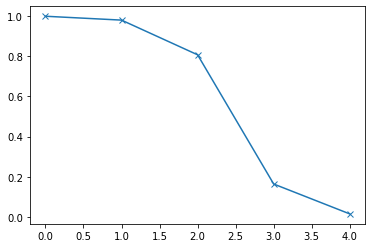

In [9]:
acc=[]
for delta in [0.01,0.1,1.0,10.0,100.0]:
    acc.append(MC(delta=delta,nsteps=10000))
plt.plot(acc,"x-")

In [10]:
def MC(nsteps=100,delta=0.1,q0=0.0):
    q=q0
    kappa=1.0
    ene=0.5*kappa*q**2
    traj=[]
    acc=[]
    for istep in range(nsteps):
        qtry=q+(2*np.random.rand()-1)*delta
        enetry=0.5*kappa*qtry**2
        deltae=enetry-ene
        if deltae<=0.0:
            acceptance=1.0
        else:
            acceptance=np.exp(-deltae)
        if acceptance>np.random.rand():
            q=qtry
            ene=enetry
        traj.append(q)
    traj=np.array(traj)
    return traj

In [11]:
traj=MC(nsteps=100000)

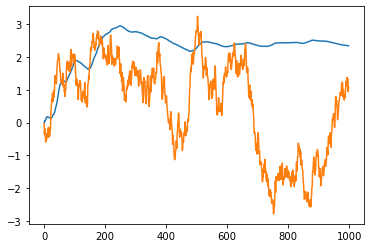

In [12]:
avq2=[]
q=[]
# too short traj! to show what happens looking at averages
for i in range(10,10000,10):
    avq2.append(np.average(traj[:i]**2))
    q.append(traj[i])
plt.plot(avq2)
plt.plot(q)

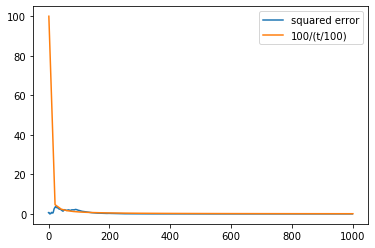

In [13]:
error=[]
for i in range(100,100000,100):
    error.append((np.average(traj[:i]**2)-1.0)**2)
plt.plot(error,label="squared error")
x=np.linspace(1,1000)
plt.plot(x,100/x,label="100/(t/100)")
#plt.ylim((0.0,8.0))
plt.legend()
plt.show()

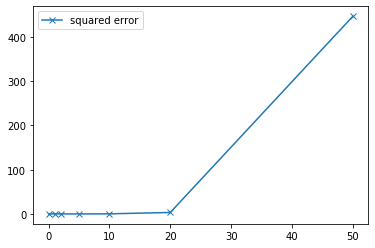

In [14]:
error=[]
q0s=[0.0,1.0,2.0,5.0,10.0,20.0,50.0]
for q0 in q0s:
    error.append((np.average(MC(nsteps=100000,q0=q0)**2)-1.0)**2)
plt.plot(q0s,error,"x-",label="squared error")
plt.legend()
plt.show()

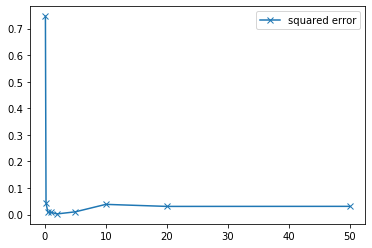

In [15]:
error=[]
np.random.seed(1977)
deltas=[0.1,0.2,0.5,1.0,2.0,5.0,10.0,20.0,50.0]
for delta in deltas:
    error.append((np.average(MC(nsteps=1000,delta=delta)**2)-1.0)**2)
plt.plot(deltas,error,"x-",label="squared error")
plt.legend()
plt.show()

In [16]:
def MC(nsteps=10000,q0=None,delta=1.0,kappa=1.0):
    if q0 is None:
        q0=np.zeros((2,3))
    L=4
    q=+q0
    ene=0.5*kappa*(np.sqrt(np.sum((q[1]-q[0])**2))-L)**2
    traj=[]
    for istep in range(nsteps):
        i=np.random.randint(6)
        qtry=+q
        if(i<3):
            qtry[0,i]+=(2*np.random.rand()-1)*delta
        else:
            qtry[1,i-3]+=(2*np.random.rand()-1)*delta
        enetry=0.5*kappa*(np.sqrt(np.sum((qtry[1]-qtry[0])**2))-L)**2
        deltae=enetry-ene
        if deltae<=0.0:
            acceptance=1.0
        else:
            acceptance=np.exp(-deltae)
        if acceptance>np.random.rand():
            q=+qtry
            ene=enetry
        traj.append(q)
    traj=np.array(traj)
    return traj

In [17]:
traj=MC()

In [18]:
def write_xyz(traj):
    with open(file="traj.xyz",mode="w") as f:
        for i in range(traj.shape[0]):
            print(2,file=f)
            print("comment",file=f)
            print("Ar",traj[i,0,0],traj[i,0,1],traj[i,0,2],file=f)
            print("Ar",traj[i,1,0],traj[i,1,1],traj[i,1,2],file=f)
        

In [19]:
write_xyz(traj)

In [20]:
traj=MC(kappa=1.0)

In [21]:
dist=np.sqrt(np.sum((traj[:,1]-traj[:,0])**2,axis=1))

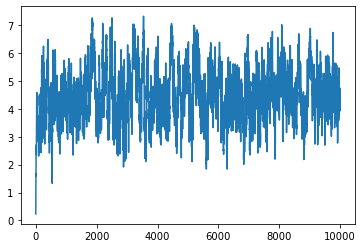

In [22]:
plt.plot(dist)

In [23]:
np.average(dist[1000:])

4.521505741510669

In [24]:
h=np.histogram(dist[1000:],range=(1,7),bins=50)

In [25]:
h

(array([  0,   0,   0,   0,   0,   0,   0,   6,   8,  12,  41,  25,  42,
         51,  79, 102, 122, 155, 189, 256, 289, 300, 333, 392, 398, 413,
        459, 417, 414, 435, 449, 371, 360, 353, 320, 300, 269, 264, 241,
        189, 209, 151, 106, 101, 101,  60,  63,  59,  36,  27]),
 array([1.  , 1.12, 1.24, 1.36, 1.48, 1.6 , 1.72, 1.84, 1.96, 2.08, 2.2 ,
        2.32, 2.44, 2.56, 2.68, 2.8 , 2.92, 3.04, 3.16, 3.28, 3.4 , 3.52,
        3.64, 3.76, 3.88, 4.  , 4.12, 4.24, 4.36, 4.48, 4.6 , 4.72, 4.84,
        4.96, 5.08, 5.2 , 5.32, 5.44, 5.56, 5.68, 5.8 , 5.92, 6.04, 6.16,
        6.28, 6.4 , 6.52, 6.64, 6.76, 6.88, 7.  ]))

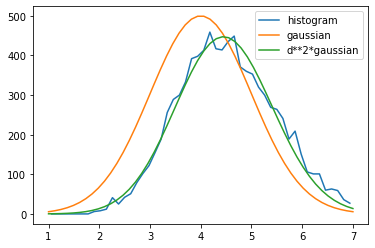

In [26]:
plt.plot(0.5*(h[1][:-1]+h[1][1:]),h[0],label="histogram")
x=np.linspace(1,7)
plt.plot(x,500*np.exp(-(x-4)**2/2),label="gaussian")
plt.plot(x,25*x**2*np.exp(-(x-4)**2/2),label="d**2*gaussian")
plt.legend()

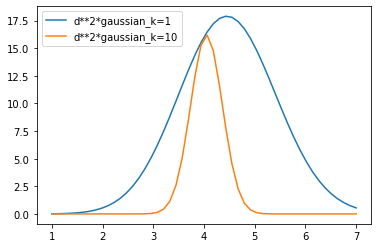

In [27]:
x=np.linspace(1,7)
plt.plot(x,x**2*np.exp(-(x-4)**2/2),label="d**2*gaussian_k=1")
plt.plot(x,x**2*np.exp(-10*(x-4)**2/2),label="d**2*gaussian_k=10")
plt.legend()